In [23]:
import numpy as np
import matplotlib.pyplot as plt

First we approximate the earths magnetic field to a dipole using spherical coordinates.

In [24]:
R = 6371e3 # Earths mean radius [m] 
B_0 = 3.12e-5 # Earths mean magnetic field strength [T]


def get_B_field(pos): # The field will have azimuthal symmetry

    r_vec = np.array(pos)
    r = np.linalg.norm(pos)
    m_hat = np.array([np.sin(np.radians(11 + 23.5)), 0, np.cos(np.radians(11 + 23.5))])

    if r<R:
        return np.array([0,0,0])
    
    r_hat = r_vec/r

    B_vec = B_0 / (R/r)**3 * (3 * (np.dot(m_hat,r_hat))*r_hat-m_hat)

    return B_vec


# Plots

<>:32: SyntaxWarning: invalid escape sequence '\c'
<>:32: SyntaxWarning: invalid escape sequence '\c'
C:\Users\mikke\AppData\Local\Temp\ipykernel_6436\3769236395.py:32: SyntaxWarning: invalid escape sequence '\c'
  ax1.set_title("XZ Plane (Side View, tilted $34.5^\circ$)")


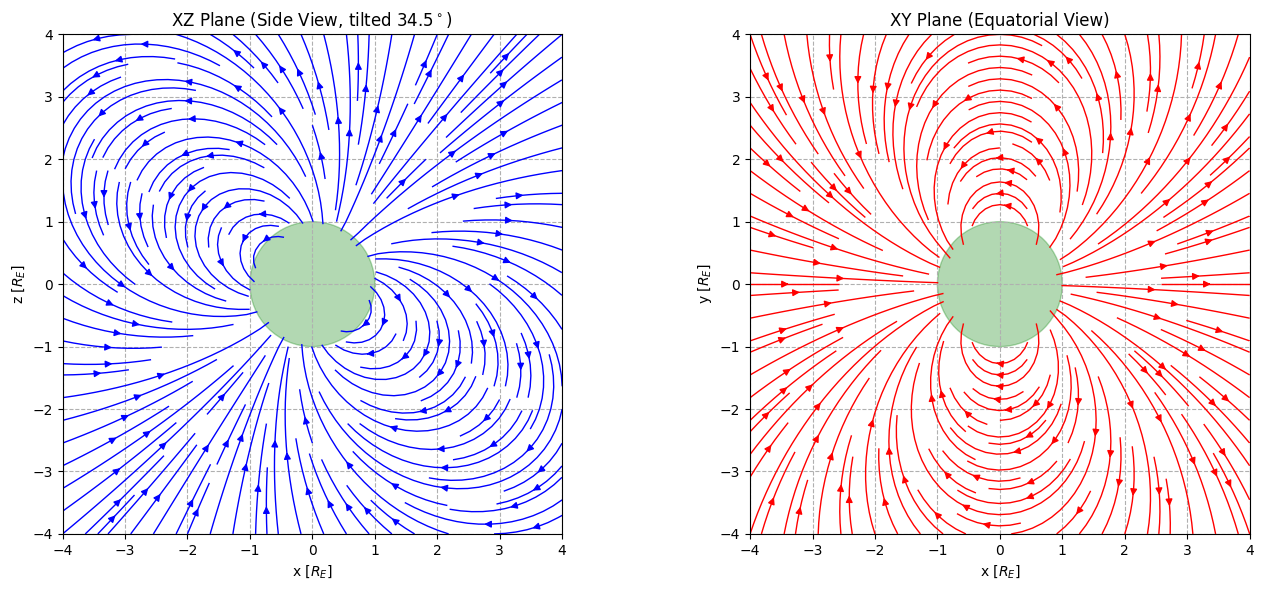

In [25]:
limit = 4 * R
points = 50
coords = np.linspace(-limit, limit, points)
X_grid, Z_grid = np.meshgrid(coords, coords)

# Initialize arrays for components
# XZ Plane (y = 0)
Bx_xz = np.zeros_like(X_grid)
Bz_xz = np.zeros_like(Z_grid)

# XY Plane (z = 0)
Bx_xy = np.zeros_like(X_grid)
By_xy = np.zeros_like(Z_grid)

# Calculate field at each point
for i in range(points):
    for j in range(points):
        # XZ calculation
        b_xz = get_B_field(np.array([X_grid[i,j], 0, Z_grid[i,j]]))
        Bx_xz[i,j], Bz_xz[i,j] = b_xz[0], b_xz[2]
        
        # XY calculation
        b_xy = get_B_field(np.array([X_grid[i,j], Z_grid[i,j], 0]))
        Bx_xy[i,j], By_xy[i,j] = b_xy[0], b_xy[1]

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# XZ Plane Plot
ax1.streamplot(X_grid/R, Z_grid/R, Bx_xz, Bz_xz, color='blue', linewidth=1, density=1.5)
ax1.add_patch(plt.Circle((0, 0), 1, color='green', alpha=0.3, label='Earth'))
ax1.set_title("XZ Plane (Side View, tilted $34.5^\circ$)")
ax1.set_xlabel("x [$R_E$]")
ax1.set_ylabel("z [$R_E$]")

# XY Plane Plot
ax2.streamplot(X_grid/R, Z_grid/R, Bx_xy, By_xy, color='red', linewidth=1, density=1.5)
ax2.add_patch(plt.Circle((0, 0), 1, color='green', alpha=0.3))
ax2.set_title("XY Plane (Equatorial View)")
ax2.set_xlabel("x [$R_E$]")
ax2.set_ylabel("y [$R_E$]")

for ax in [ax1, ax2]:
    ax.set_aspect('equal')
    ax.grid(True, linestyle='--')

plt.tight_layout()
plt.show()